In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
theta = 0.25 # true unknown parameter, P(HEAD)
a = 20 # parameter a of the prior
b = 10 # parameter b of the prior
n = 50 # number of coin tosses

In [4]:
dtheta = 1e-3
theta_vec = np.arange(0, 1, dtheta)

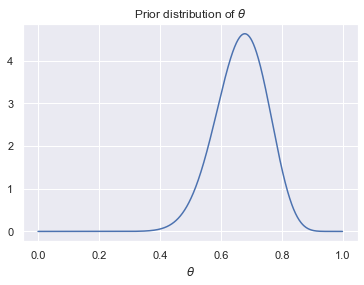

In [5]:
p_theta_prior = stats.beta.pdf(theta_vec, a, b)
plt.plot(theta_vec, p_theta_prior)
plt.xlabel(r"$\theta$");
plt.title(r"Prior distribution of $\theta$");

In [6]:
y = np.random.binomial(n, theta)

In [7]:
lik_y = (theta_vec ** y) * (1 - theta_vec)**(n-y)

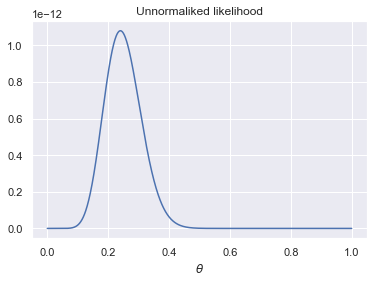

In [8]:
plt.plot(theta_vec, lik_y)
plt.xlabel(r"$\theta$");
plt.title("Unnormaliked likelihood");

In [9]:
p_theta_post = lik_y * p_theta_prior
p_theta_post = p_theta_post/(np.sum(p_theta_post) * dtheta)
p_theta_post_exact = stats.beta.pdf(theta_vec, a+y, b+n-y)

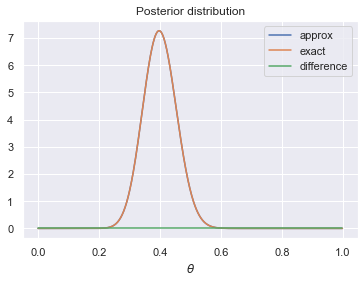

In [10]:
plt.plot(theta_vec, p_theta_post, label="approx")
plt.plot(theta_vec, p_theta_post_exact, label="exact")
plt.plot(theta_vec, p_theta_post - p_theta_post_exact, label="difference")
plt.xlabel(r"$\theta$");
plt.legend()
plt.title("Posterior distribution");

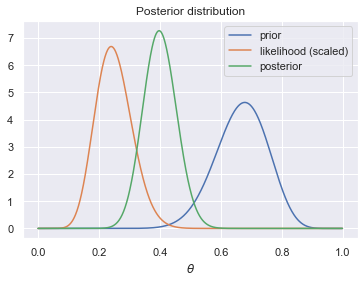

In [11]:
lik_y_scaled = lik_y/((np.sum(lik_y) * dtheta))

plt.plot(theta_vec, p_theta_prior, label="prior")
plt.plot(theta_vec, lik_y_scaled, label="likelihood (scaled)")
plt.plot(theta_vec, p_theta_post_exact, label="posterior")


plt.xlabel(r"$\theta$");
plt.legend()
plt.title("Posterior distribution");